## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

## 1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [16]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import  matplotlib.pyplot as plt

In [17]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

### 調整不同決策標準Criterion參數對決策樹的影響

In [18]:
def test_DecisionTreeClassifier_criterion(*data):
    x_train, x_test, y_train, y_test = data
    criterions = ['gini','entropy']
    for criterion in criterions:
        # 建立模型
        clf = DecisionTreeClassifier(criterion=criterion)
        # 訓練模型
        clf.fit(x_train,y_train)
        print('criterion:%s'%criterion)
        print("Traing score:%f" % (clf.score(x_train, y_train)))
        print("Testing score:%f"%(clf.score(x_test,y_test)))
        
        
test_DecisionTreeClassifier_criterion(x_train, x_test, y_train, y_test)

criterion:gini
Traing score:1.000000
Testing score:0.973684
criterion:entropy
Traing score:1.000000
Testing score:0.973684


### 特徵劃分選擇，隨機和最佳參數對決策樹的影響

In [19]:
def test_DecisionTreeClassifier_splitter(*data):
    x_train, x_test, y_train, y_test = data
    splitters = ['best','random']
    for splitter in splitters:
        clf = DecisionTreeClassifier(splitter=splitter)
        clf.fit(x_train,y_train)
        print("splitter:%s"%splitter)
        print("Traing score:%f" % (clf.score(x_train, y_train)))
        print("Testing score:%f"%(clf.score(x_test,y_test)))
        
        
test_DecisionTreeClassifier_splitter(x_train, x_test, y_train, y_test)

splitter:best
Traing score:1.000000
Testing score:0.973684
splitter:random
Traing score:1.000000
Testing score:0.947368


### 深度參數對決策樹的影響

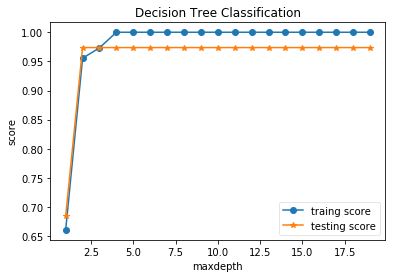

In [20]:
def test_DecisionTreeClassifiter_depth(*data,maxdepth):
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    #繪圖
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label='traing score',marker='o')
    ax.plot(depths,testing_scores,label='testing score',marker='*')
    ax.set_xlabel('maxdepth')
    ax.set_ylabel('score')
    ax.set_title('Decision Tree Classification')
    ax.legend(framealpha=0.5,loc='best')
    plt.show()

test_DecisionTreeClassifiter_depth(x_train, x_test, y_train, y_test,maxdepth=20)

In [6]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

NameError: name 'clf' is not defined

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01796599 0.52229134 0.45974266]


## 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [21]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

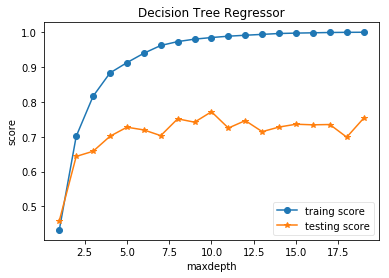

In [25]:
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    x_train, x_test, y_train, y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = DecisionTreeRegressor(max_depth=depth)
        clf.fit(x_train,y_train)
        training_scores.append(clf.score(x_train,y_train))
        testing_scores.append(clf.score(x_test,y_test))
    #繪圖
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label='traing score',marker='o')
    ax.plot(depths,testing_scores,label='testing score',marker='*')
    ax.set_xlabel('maxdepth')
    ax.set_ylabel('score')
    ax.set_title('Decision Tree Regressor')
    ax.legend(framealpha=0.5,loc='best')
    plt.show()

test_DecisionTreeRegressor_depth(x_train, x_test, y_train, y_test,maxdepth=20)

In [26]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

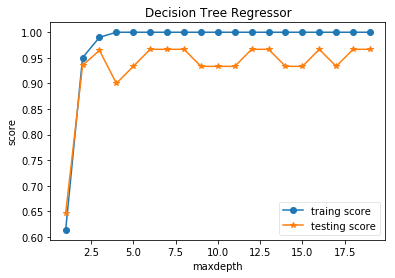

In [27]:
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    x_train, x_test, y_train, y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = DecisionTreeRegressor(max_depth=depth)
        clf.fit(x_train,y_train)
        training_scores.append(clf.score(x_train,y_train))
        testing_scores.append(clf.score(x_test,y_test))
    #繪圖
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label='traing score',marker='o')
    ax.plot(depths,testing_scores,label='testing score',marker='*')
    ax.set_xlabel('maxdepth')
    ax.set_ylabel('score')
    ax.set_title('Decision Tree Regressor')
    ax.legend(framealpha=0.5,loc='best')
    plt.show()

test_DecisionTreeRegressor_depth(x_train, x_test, y_train, y_test,maxdepth=20)